In [249]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [250]:
# Read the mouse data and the study results:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
#mouse_metadata
study_results= pd.read_csv("data/Study_results.csv")



In [251]:
# Combine the data into a single dataset:
mice_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
mice_results_df = mice_results
mice_results_df.head()


# Display the data table for preview
mice_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [252]:
# Checking the number of mice.
mouse_total = mice_results_df["Mouse ID"].nunique()
mouse_total

249

In [253]:
# Checking for missing values:
mice_results_df.isnull().sum()


Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [254]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False
                          )

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [255]:
dup_mouse_id = mice_results_df.loc[mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dup_mouse_id)

['g989']


In [256]:
# Get all the data for the duplicate mouse ID
dup_mouse_df = mice_results_df.loc[mice_results_df["Mouse ID"] == "g989", :]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [257]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mice_results_df[mice_results_df['Mouse ID'].isin(dup_mouse_id)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [258]:
# Recheck the number of mice to make sure g989 is droppped
new_total_mice = clean_mouse_df["Mouse ID"].nunique()
new_total_mice




248

# Summary Statistics


In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std_dev = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                               "Tumor Volume Variance": var, "Tumor Volume Std. Dev": std_dev,
                           "Tumor Volume Std. Err": sem})

summary_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [260]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# # Using the aggregation method, produce the same summary statistics in a single line
# sum_stat_agg = clean_mouse_df.groupby(["Tumor Volume (mm3)"])[["Drug Regimen"]].agg
# ("mean", "median", "var", "std", "sem")
# sum_stat_agg



# Bar and Pie Charts



In [261]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# first need to calculate total no. of rows per Drug regimen
dreg_df = clean_mouse_df["Drug Regimen"].value_counts()
dreg_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

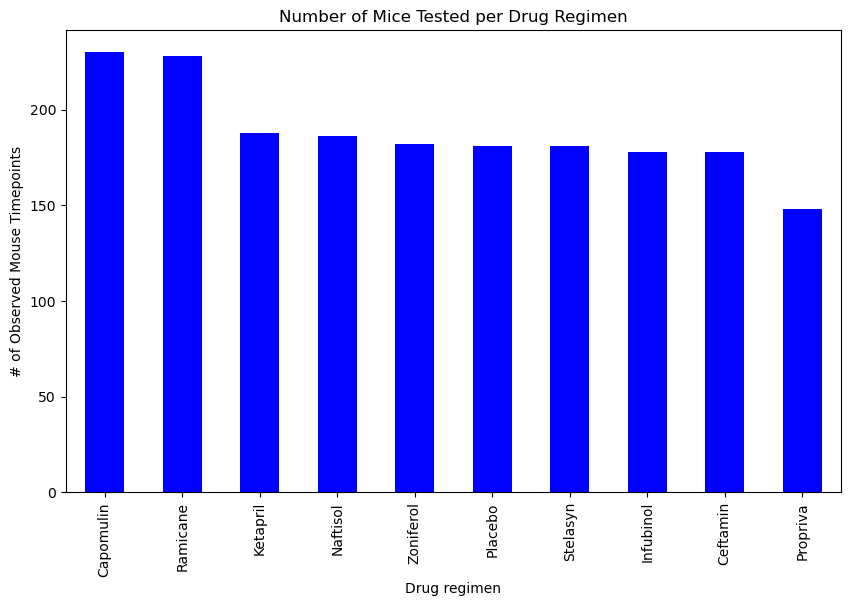

In [262]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dreg_df.plot(kind="bar", facecolor="blue", figsize=(10,6),title = "Number of Mice Tested per Drug Regimen", xlabel ="Drug regimen",
                    ylabel = "# of Observed Mouse Timepoints")


dreg_df

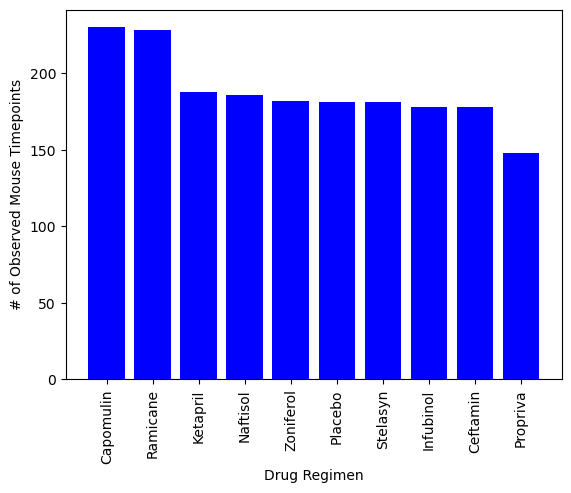

In [263]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = dreg_df.index.values
y_axis = dreg_df.values

plt.bar(x_axis, y_axis, color="blue", alpha=1, align='center')
# plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


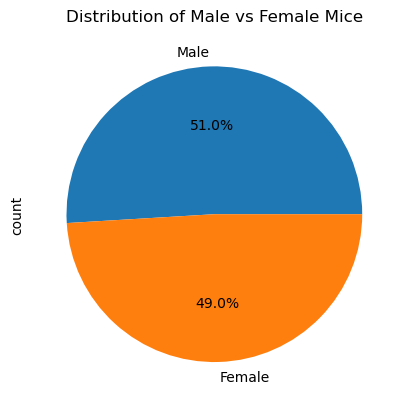

In [264]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = clean_mouse_df["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%",
                                                      title = "Distribution of Male vs Female Mice")


plt.show()

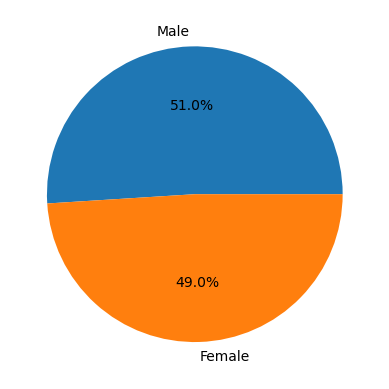

In [265]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plt.title("Distribution of Male vs Female Mice") #######

labels = ["Male", "Female"]
sizes = [51, 49]
plt.pie(sizes, labels = labels,autopct="%1.1f%%")

# plt.title("Distribution of Male vs Female Mice")


plt.show()


# Quartiles, Outliers and Boxplots



In [266]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tumor = clean_mouse_df.groupby("Mouse ID").max()["Timepoint"]
max_tumor = max_tumor.reset_index()

merged_data = max_tumor.merge(clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [267]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes

    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
     # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers}")



    
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [274]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

x_axis = np.arange(final_tumor_vol)
tick_locations = treatment_list

plt.figure(figsize=(10,10))
plt.boxplot(x_axis, "Tumor Volume (mm3)", color='r')
plt.xticks(tick_locations, "Tumor Volume (mm3)", rotation="vertical")
plt.show()








# plt.boxplot(tumor_vol_data.groupby('Drug')['Tumor Volume (mm3)'].apply(list))
# plt.xticks(rotation=45) 
# plt.ylabel('Tumor Volume (mm3)')






# plt.figure(figsize=(10, 6))
# boxplot = tumor_vol_data.boxplot(notch=True, sym='o', patch_artist=True)

# # Highlight potential outliers by changing their color and style
# colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)

# # Customize the plot
# plt.title('Distribution of Final Tumor Volume by Treatment Group')
# plt.suptitle('')  # Remove default title
# plt.xlabel('Treatment')
# plt.ylabel('Final Tumor Volume')






# data = final_tumor_vol.boxplot()
# boxplot.set_ylabel("Final Tumor Volume (mm3)")
# boxplot.set_xlabel(treatment_list)

# 


# ax1= plt.subplots()
# # ax1.set_title("Tumor Value of each Treatment Group")
# ax1.set_ylabel("Final Tumor Volume (mm3)")
# ax1.set_xlabel(treatment_list)
# distribution = plt.boxplot(final_tumor_vol)

# boxplot = final_tumor_vol.boxplot()
# boxplot.set_ylabel("Final Tumor Volume (mm3)")
# boxplot.set_xlabel(treatment_list)


# tumor_dist = final_tumor_vol
# labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# fig1, ax1 = plt.subplots()

# ax1.set_title("Tumor Value of each Treatment Group")
# ax1.set_xlabel(treatment_list)
# ax1.set_ylabel("Final Tumor Volume (mm3)")
# ax1.boxplot(fin, labels=labels)
# plt.show()

# data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
# Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# fig1, ax1 = plt.subplots(figsize=(15, 10))
# ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
# ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
# ax1.set_xlabel('Drug Regimen',fontsize = 14)
# ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

# plt.ylim(10, 80)

# plt.savefig("../Images/box_plot.png", bbox_inches = "tight")


AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen